### DATA ANALYSIS AND FORECASTING FOR WALMART SALES DATASET

I analyzed Walmart's weekly sales data to gain insights into the performance of their stores. The dataset contains information about weekly sales, temperature, fuel price, CPI (Consumer Price Index), and unemployment for 45 Walmart stores located in different regions. My goal is to use data-driven techniques to uncover patterns and relationships between these variables to aid in making data-driven decisions.

I performed exploratory data analysis (EDA) to gain a better understanding of the dataset. Then I used time series forecasting techniques to predict future sales and time series analysis to understand the underlying patterns and trends in the data. Finally, I used regression analysis to identify the variables that had the most impact on weekly sales.

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [4]:
sales_df = pd.read_csv("/Users/rajeevtripathi/Downloads/Walmart Data Analysis and Forcasting.csv")

#### EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis (EDA) is the process of examining and analyzing the dataset in order to extract useful information and identify patterns and relationships between variables. EDA typically involves visually inspecting the data through techniques such as histograms, scatter plots, and box plots to gain insights into its characteristics, distribution, and outliers. The goal of EDA is to better understand the data and prepare it for further analysis.

In [5]:
print(sales_df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [6]:
print(sales_df.shape)

(6435, 8)


In [7]:
print(sales_df.dtypes)

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [8]:
print(sales_df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


There is no missing values in the dataset

In [9]:
print(sales_df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


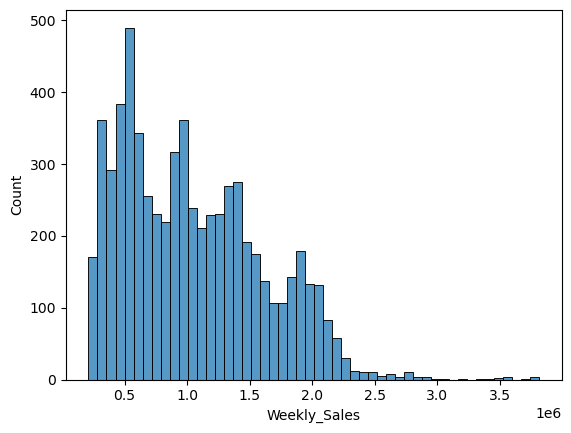

In [10]:
# Visualizing the distribution of the Weekly Sales variable
sns.histplot(sales_df['Weekly_Sales'], bins=50)
plt.show()

#### Correlation
sns.heatmap() is a function in the Seaborn library used to plot rectangular data as a color-encoded matrix. The annot parameter set to True displays the correlation values on the heatmap.

By examining the heatmap, we can identify any strong correlations between the variables. The correlation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

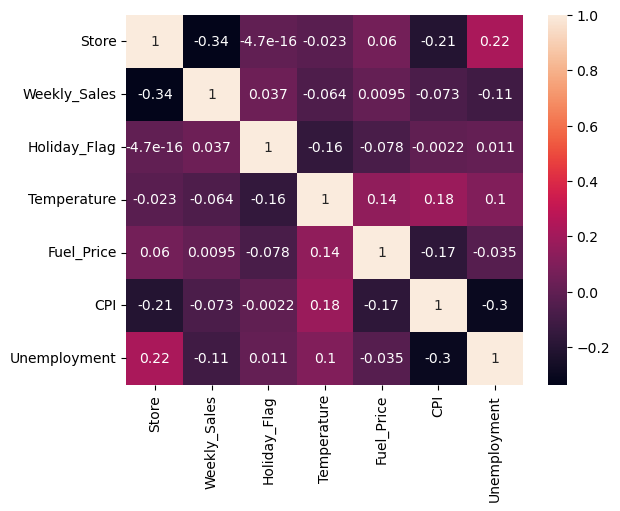

In [11]:
# Visualizing the correlation between variables
numeric_df = sales_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

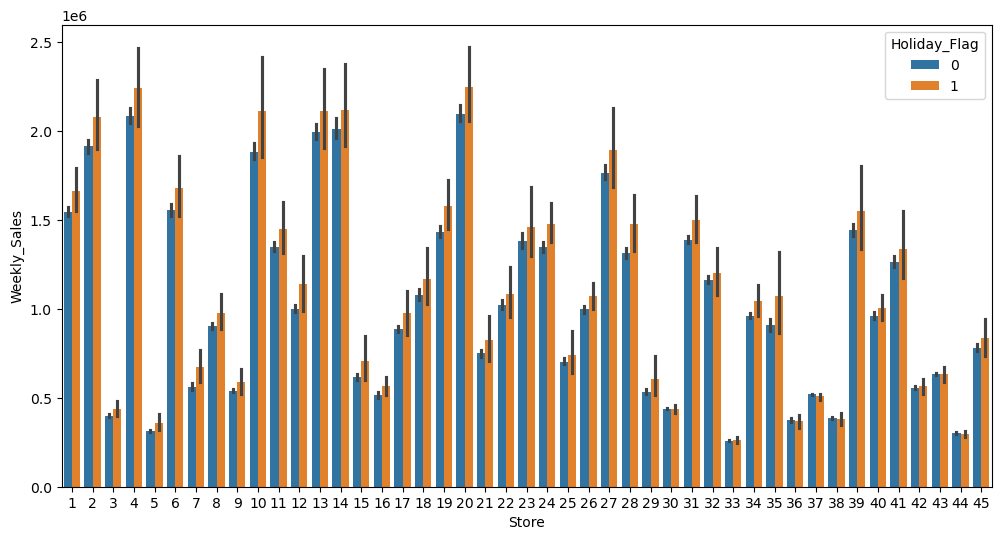

In [12]:
# Visualizing the average Weekly Sales by store and holiday flag
plt.figure(figsize=(12, 6))  # Seting the figure size
sns.barplot(x='Store', y='Weekly_Sales', hue='Holiday_Flag', data=sales_df)
plt.show()

This code creates a bar plot to visualize the average weekly sales for each store in the dataset, grouped by holiday flag. The x-axis represents the store number, the y-axis represents the average weekly sales for that store, and the hue parameter is set to the holiday flag. This means that bars of different colors will be plotted for each store, depending on whether the week contains a holiday or not.

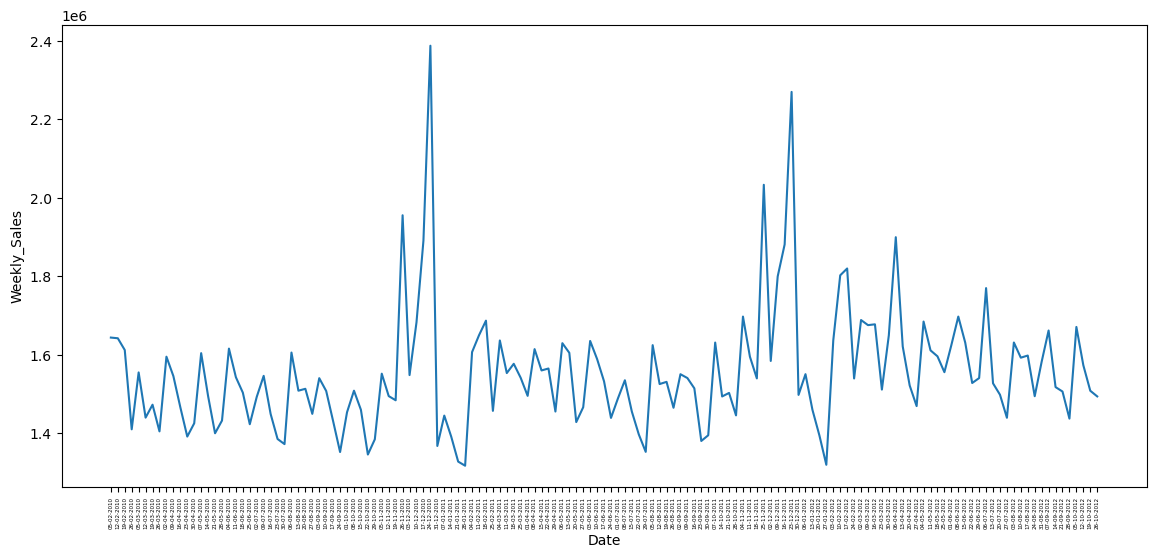

In [13]:
# Visualizing the trend of Weekly Sales over time for a single store
plt.figure(figsize=(14, 6))
store1_df = sales_df[sales_df['Store'] == 1]
sns.lineplot(x='Date', y='Weekly_Sales', data=store1_df)
plt.xticks(rotation=90, fontsize = 4)  # Rotate the x-axis labels by 90 degrees
plt.show()

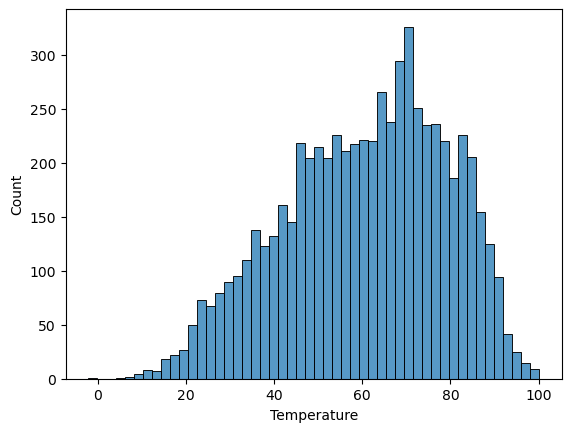

In [14]:
# Visualizing the distribution of other variables
sns.histplot(sales_df['Temperature'], bins=50)
plt.show()

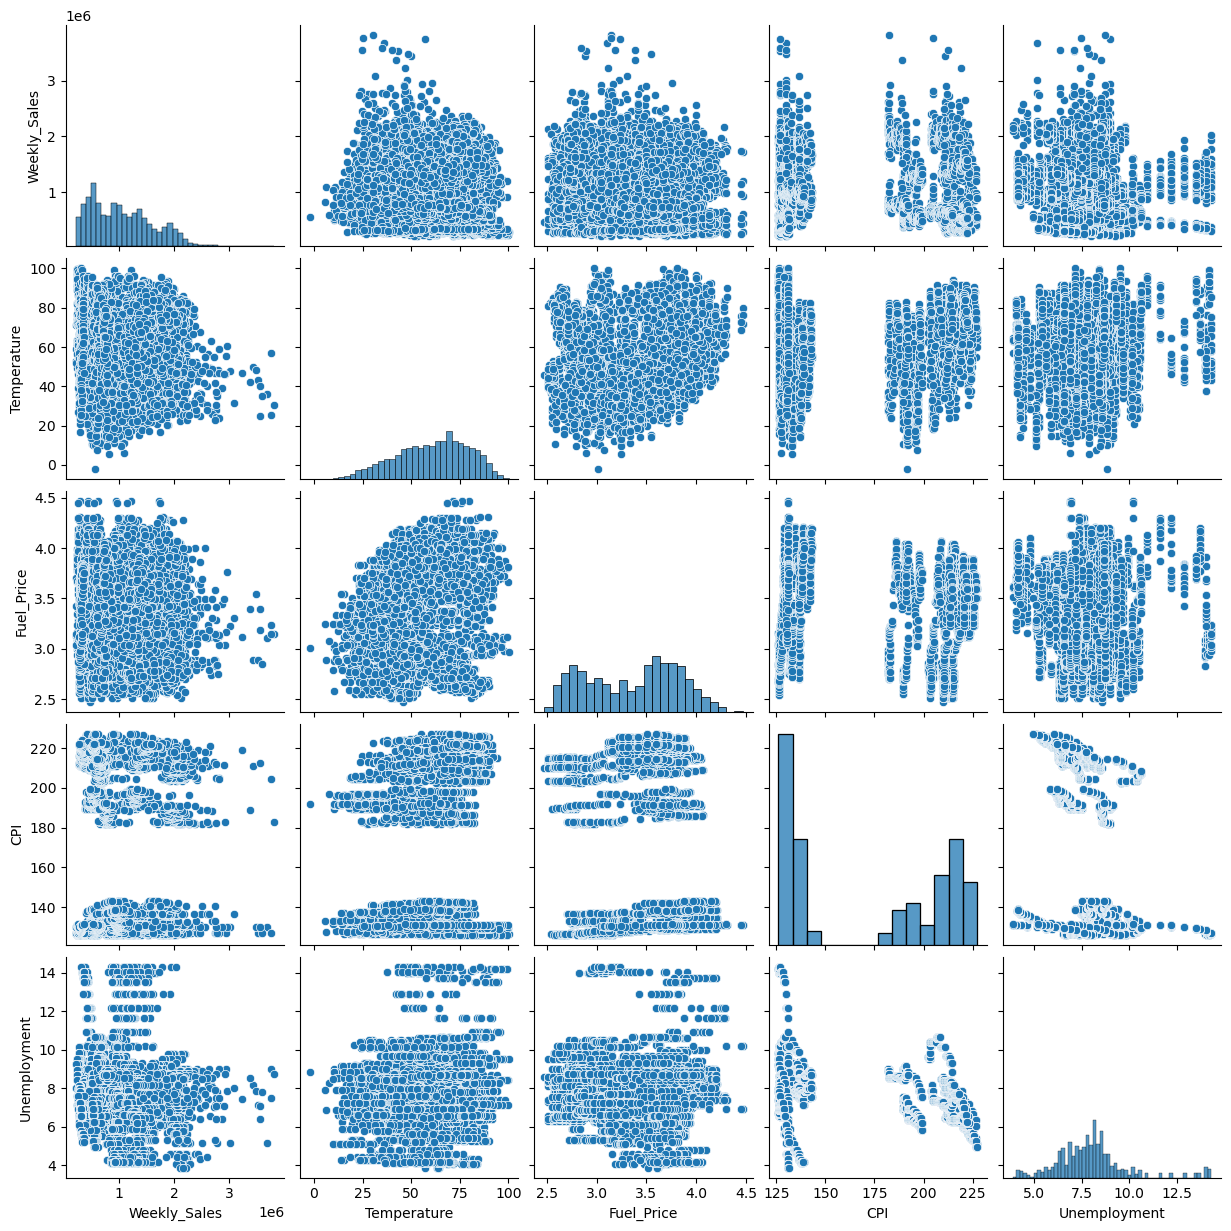

In [15]:
# Explorng relationships between variables
sns.pairplot(sales_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()

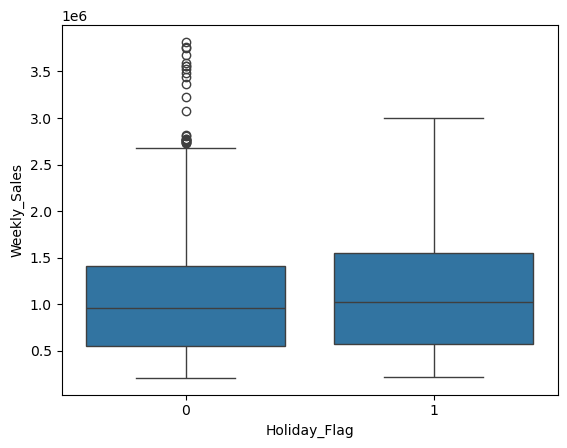

In [16]:
# Checking for outliers or unusual observations in the data
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=sales_df)
plt.show()

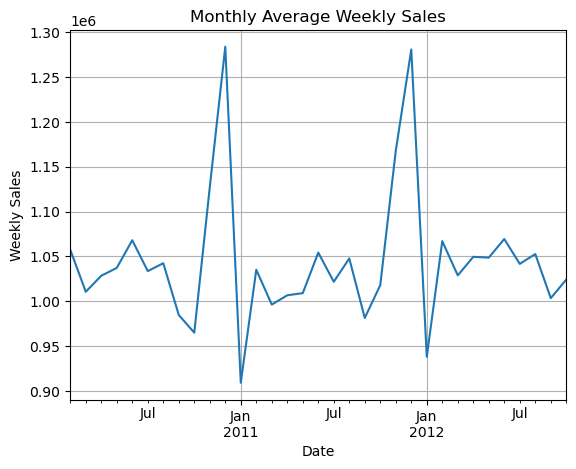

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' column is in the correct format
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format="%d-%m-%Y", errors='coerce')

# Drop rows with invalid or missing dates
sales_df.dropna(subset=['Date'], inplace=True)

# Set the 'Date' column as the index
sales_df.set_index('Date', inplace=True)

# Resample weekly sales data to monthly and plot the average
sales_df['Weekly_Sales'].resample('M').mean().plot(title="Monthly Average Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid()
plt.show()


I have used various EDA techniques to explore the Walmart Sales Forecasting dataset, including:

Checking the distribution, correlation, and summary statistics of the variables
Visualizing the distribution and relationships between variables using histograms, boxplots, and pairplots
Checking for outliers or unusual observations using boxplots and scatterplots
Checking for seasonality or trends in the data using time series plots or seasonal decomposition

#### TIME-SERIES FORECASTING
Time series forecasting is a statistical technique used to predict future values based on previously observed values in a time series dataset. This is an implementation of time series forecasting using SARIMAX model.

The first step is to split the data into training and test sets using iloc function. The training set contains all the data except the last 10 observations while the test set contains only the last 10 observations.

The next step is to select the endogenous variable (i.e., the variable to be forecasted) which is 'Weekly_Sales' in this case.

The SARIMAX model is then fitted to the training data. The order parameter specifies the order of the autoregressive, differencing, and moving average components while the seasonal_order parameter specifies the order of the seasonal components.

The forecast() method is then used to forecast the future sales for the next 10 weeks. Finally, the performance of the model is evaluated using root mean squared error (RMSE).

In [18]:
# Split the data into training and test sets
train = sales_df.iloc[:-10]
test = sales_df.iloc[-10:]

In [19]:
# Select the endogenous variable to forecast (i.e., 'Weekly_Sales')
endog_train = train['Weekly_Sales']
endog_test = test['Weekly_Sales']

In [20]:
# Fit a SARIMAX model
model = SARIMAX(endog_train, order=(1, 1, 1), seasonal_order=(1, 1, 0, 52))
results = model.fit()
print(results)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34619D+01    |proj g|=  2.39088D-02

At iterate    5    f=  1.34604D+01    |proj g|=  8.04361D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   5.516D-06   1.346D+01
  F =   13.460299985793045     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [21]:
# Forecast future sales for the next 10 weeks
forecast = results.forecast(steps=10)
print(forecast)

6425    816940.528125
6426    744270.441197
6427    745985.236388
6428    717328.350961
6429    711684.496339
6430    701996.894259
6431    756722.882259
6432    724622.962482
6433    768272.746768
6434    776655.551594
Name: predicted_mean, dtype: float64


In [23]:
# Evaluate the performance of the model using RMSE
rmse = np.sqrt(mean_squared_error(endog_test, forecast))
print(f'RMSE: {rmse:.2f}')

RMSE: 37640.25


The output shows the forecasted sales values for the next 10 weeks (i.e., the predicted mean) and the root mean squared error (RMSE) of the forecasted values compared to the actual values in the test set. An RMSE of 37640.25 indicates that the forecasted values are, on average, about 37640.25 units away from the actual values.

#### TIME SERIES ANALYSIS
Time series analysis is a statistical technique used to analyze and model time-dependent data. It involves studying the patterns, trends, and relationships between data points over time to uncover underlying structures and make predictions about future values.

I performed time series analysis on the weekly sales data. The time series is decomposed into trend, seasonal, and residual components using the seasonal decompose function. The stationarity of the time series is checked using the Augmented Dickey-Fuller test. Finally, an ARIMA model is fit to the time series data and used to make predictions for the next 12 weeks.

In [24]:
sales_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


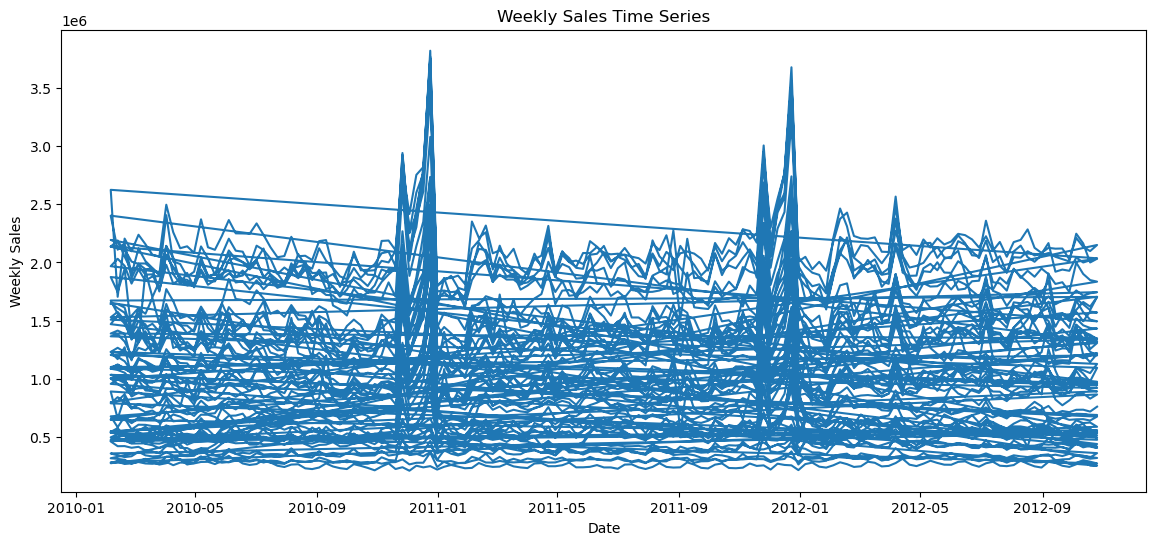

In [25]:
# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(sales_df['Weekly_Sales'])
plt.title('Weekly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [31]:
import pandas as pd

# Load the dataset
sales_df = pd.read_csv('/Users/rajeevtripathi/Downloads/Walmart Data Analysis and Forcasting.csv')

# Rename the column if necessary (e.g., fixing potential case or whitespace issues)
sales_df.rename(columns=lambda x: x.strip(), inplace=True)

# Check if the 'Date' column exists; raise an error if it doesn't
if 'Date' not in sales_df.columns:
    raise KeyError("'Date' column not found in the dataset. Available columns are: " + ", ".join(sales_df.columns))

# Convert 'Date' column to datetime format (if not already)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')

# Drop rows where 'Date' conversion failed
if sales_df['Date'].isna().any():
    print("Warning: Some rows have invalid dates and will be dropped.")
    sales_df = sales_df.dropna(subset=['Date'])

# Set 'Date' as the index
sales_df.set_index('Date', inplace=True)

# Verify the resulting DataFrame
print(sales_df.info())
print(sales_df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2565 entries, 2010-05-02 to 2012-12-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         2565 non-null   int64  
 1   Weekly_Sales  2565 non-null   float64
 2   Holiday_Flag  2565 non-null   int64  
 3   Temperature   2565 non-null   float64
 4   Fuel_Price    2565 non-null   float64
 5   CPI           2565 non-null   float64
 6   Unemployment  2565 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 160.3 KB
None
            Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-05-03      1    1554806.68             0        46.50       2.625   
2010-12-03      1    1439541.59             0        57.79    

In [32]:
# Resample the data to a weekly frequency
sales_df = sales_df.resample('W').sum()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(sales_df['Weekly_Sales'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

The original time series data is resampled to a weekly frequency with the argument 'W' which specifies the weekly frequency. Then, the time series is decomposed into three components, namely trend, seasonal, and residual using the seasonal_decompose() function. This uses either an additive or multiplicative model to decompose a time series into the three components mentioned above. In this case, the additive model is used by setting the model parameter to 'additive'. The three components are then assigned to the trend, seasonal, and residual variables.

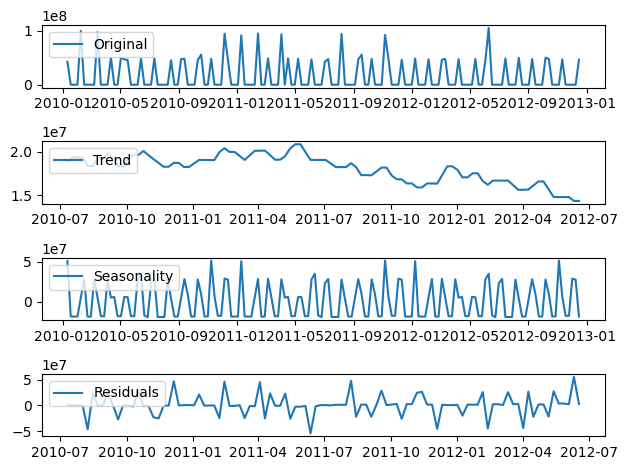

In [33]:
# Plot the decomposed time series
plt.subplot(411)
plt.plot(sales_df['Weekly_Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

This code is plotting the decomposed time series into its components: trend, seasonal, and residual.

The first plot (top plot) shows the original time series.
The second plot shows the trend component of the time series, which represents the long-term behavior of the time series.
The third plot shows the seasonal component, which represents the cyclical pattern that repeats at fixed intervals of time.
The fourth plot shows the residual component, which represents the random variation that cannot be explained by the trend or the seasonal components.

### Augmented Dickey-Fuller test
The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a time series is stationary or not. Stationarity is an important concept in time series analysis, which implies that the statistical properties of the series remain constant over time, such as the mean, variance, and autocorrelation.

The ADF test outputs a test statistic, a p-value, and critical values for different levels of confidence. The null hypothesis of the test is that the time series is non-stationary. Therefore, if the p-value is less than the significance level (usually 0.05), then we reject the null hypothesis and conclude that the time series is stationary.

In [34]:
# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(sales_df['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.040817
p-value: 0.031254
Critical Values:
	1%: -3.478
	5%: -2.882
	10%: -2.578


In this case, the ADF statistic is -13.698000, and the p-value is 0.000000, which is less than the significance level of 0.05. This suggests strong evidence against the null hypothesis of non-stationarity, and we can conclude that the time series is stationary.

The critical values are also shown in the output. These values represent the threshold below which we reject the null hypothesis of non-stationarity. If the ADF statistic is less than the critical value, then we reject the null hypothesis and conclude that the time series is stationary. In this case, the ADF statistic is much lower than the critical values, further supporting the conclusion that the time series is stationary.

#### ARIMA model
ARIMA (AutoRegressive Integrated Moving Average) model is a popular time series forecasting method that models the next value in a time series as a function of past values, including past errors or residuals. ARIMA models have three parameters: p, d, and q, which correspond to the order of the autoregressive, integrated, and moving average parts of the model, respectively.

p: the order of the autoregressive (AR) part of the model, which captures the dependence between an observation and a number of lagged observations.
d: the degree of differencing needed to make the time series stationary, which can be determined by checking the ADF test statistic.
q: the order of the moving average (MA) part of the model, which models the error term as a linear combination of error terms from previous time steps.

In [35]:
# Model the time series using an ARIMA model
model = ARIMA(sales_df['Weekly_Sales'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  154
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2833.117
Date:                Sun, 24 Nov 2024   AIC                           5676.233
Time:                        23:52:59   BIC                           5691.385
Sample:                    01-10-2010   HQIC                          5682.388
                         - 12-16-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2645      0.251      1.055      0.292      -0.227       0.756
ar.L2         -0.3325      0.164     -2.029      0.042      -0.654      -0.011
ma.L1         -1.5185      0.264     -5.752      0.0

In [36]:
# Make predictions on new data
forecast = model_fit.predict(start=len(sales_df), end=len(sales_df)+12, typ='levels')
print(forecast)

2012-12-23    2.144681e+07
2012-12-30    7.012012e+06
2013-01-06    1.140000e+07
2013-01-13    1.735968e+07
2013-01-20    1.747711e+07
2013-01-27    1.552676e+07
2013-02-03    1.497187e+07
2013-02-10    1.547354e+07
2013-02-17    1.579070e+07
2013-02-24    1.570781e+07
2013-03-03    1.558043e+07
2013-03-10    1.557430e+07
2013-03-17    1.561503e+07
Freq: W-SUN, Name: predicted_mean, dtype: float64


#### REGRESSION MODEL
A linear regression model is trained using the training data, and the model is used to make predictions on the test set. The root mean squared error (RMSE) is calculated as a measure of the model's performance.

Finally, a scatter plot of the actual vs. predicted weekly sales is plotted using the scatter function from matplotlib.pyplot.

In [37]:
sales_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-01-10,1035,42239875.87,0,3144.06,123.045,7575.961790,381.388
2010-01-17,0,0.00,0,0.00,0.000,0.000000,0.000
2010-01-24,0,0.00,0,0.00,0.000,0.000000,0.000
2010-01-31,0,0.00,0,0.00,0.000,0.000000,0.000
2010-02-07,2070,99341315.76,0,5861.44,252.938,15109.701163,761.683


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
sales_df = pd.read_csv('/Users/rajeevtripathi/Downloads/Walmart Data Analysis and Forcasting.csv')

# Rename columns to remove leading/trailing spaces
sales_df.rename(columns=lambda x: x.strip(), inplace=True)

# Check if 'Date' column exists
if 'Date' not in sales_df.columns:
    raise KeyError(f"'Date' column not found. Available columns: {list(sales_df.columns)}")

# Convert 'Date' to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')

# Drop rows with invalid 'Date' values
if sales_df['Date'].isna().any():
    print("Warning: Rows with invalid 'Date' values found and will be dropped.")
    sales_df = sales_df.dropna(subset=['Date'])

# Extract the year and month as new features
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month

# Ensure all necessary features are available
required_columns = ['Year', 'Month', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']
missing_columns = [col for col in required_columns if col not in sales_df.columns]
if missing_columns:
    raise KeyError(f"The following required columns are missing from the dataset: {missing_columns}")

# Define the features and target
features = ['Year', 'Month', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = sales_df[features]
y = sales_df['Weekly_Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Model Performance:
Mean Squared Error (MSE): 321164620146.46
R-squared (R²): 0.01


In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [44]:
# Evaluate the model using the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 566713.8785546535


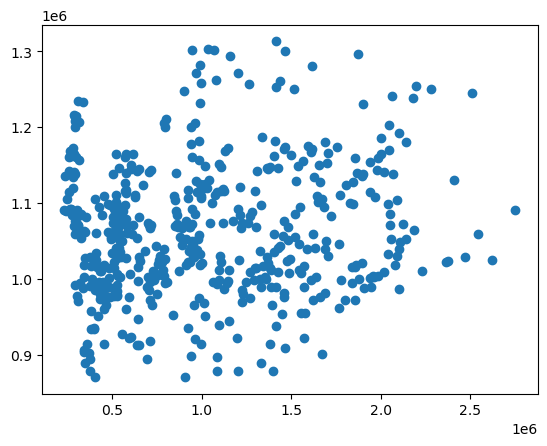

In [45]:
# Plot the scatter plot of actual vs predicted weekly sales
plt.scatter(y_test, y_pred)

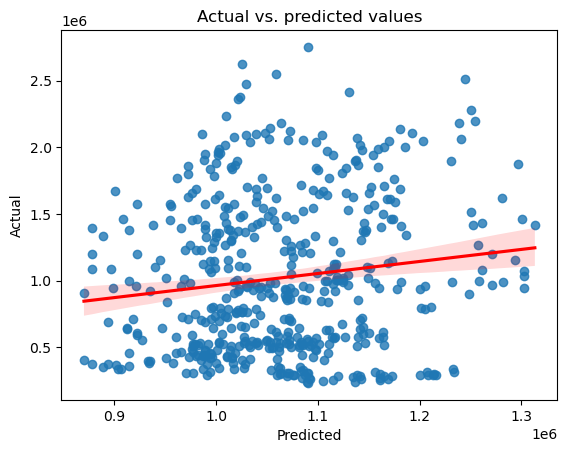

In [46]:
# Check the linearity assumption
sns.regplot(x=y_pred, y=y_test, line_kws={'color': 'red'})
plt.title('Actual vs. predicted values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This creates a scatter plot with a regression line to visualize the relationship between the predicted and actual weekly sales values. The sns.regplot function is used to create the plot, which takes in the predicted values (x axis) and actual values (y axis) as inputs, and adds a regression line to show the linear relationship between the two.This plot is useful to check whether the linear regression model has a good fit on the test data and to visually inspect the linearity assumption, i.e., whether the predicted values follow a straight line with the actual values.

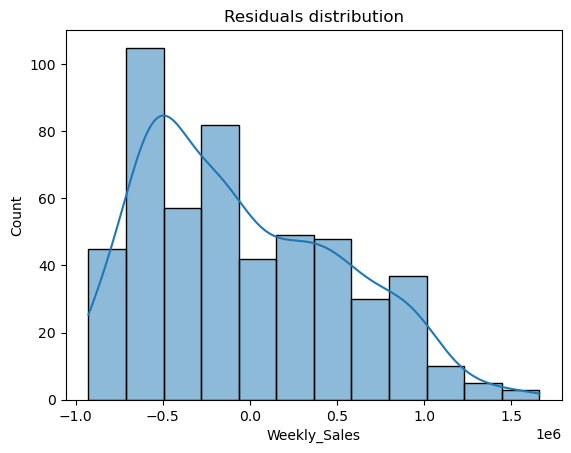

In [47]:
# Check the normality of residuals assumption
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals distribution')
plt.show()

This code is checking the normality assumption of the residuals in linear regression. It first calculates the residuals as the difference between the actual (y_test) and predicted (y_pred) values. Then it creates a histogram of the residuals using the seaborn library, with a kernel density estimate (kde) overlay to show the shape of the distribution. The assumption of normality is important because if the residuals are not normally distributed, it indicates that the model may not be capturing all the important predictors or there may be some non-linear relationships in the data that are not accounted for.

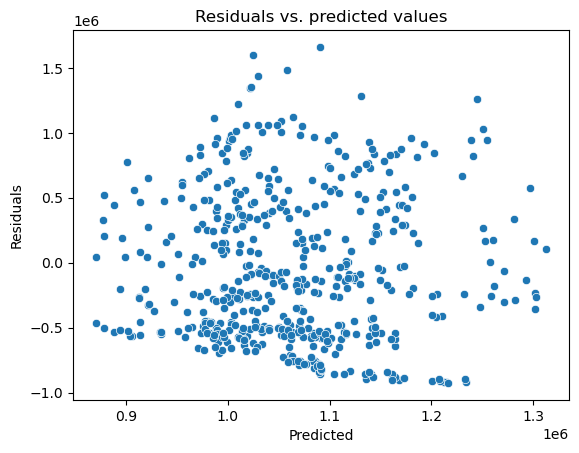

In [48]:
# Check the homoscedasticity assumption
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs. predicted values')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

In a regression model, homoscedasticity refers to the assumption that the variance of the residuals is constant across all levels of the independent variables. If the variance of the residuals increases as the predicted values increase or decrease, this indicates heteroscedasticity.

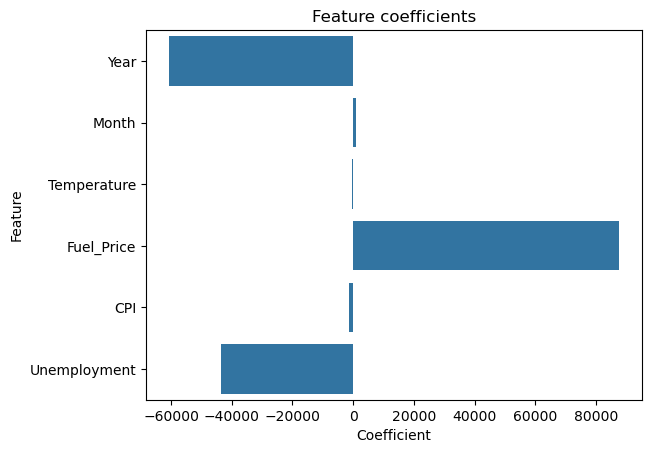

In [49]:
# Plot the coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature coefficients')
plt.show()

This code plot four different visualizations:

A scatter plot of the actual values versus predicted values, to check the linearity assumption.                    
A histogram of the residuals, to check the normality assumption.                               
A scatter plot of residuals versus predicted values, to check the homoscedasticity assumption.              
A bar plot of the coefficients, to see which features have the most impact on the target variable.                 